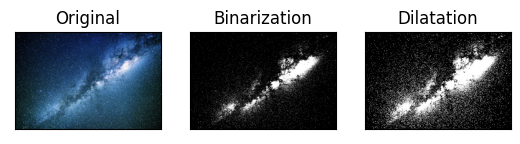

In [2]:
#Подключение библиотек
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

#Функция перекрашивает соседей заданного пикселя в белый
def neighbors_update(array, radius, row_index, column_index):
    for j in range(column_index-radius, column_index+1+radius):
        for i in range(row_index-radius, row_index+1+radius):
            if i >= 0 and i < len(array) and j >= 0 and j < len(array[0]):
                array[i][j] = 255

test = []
img = cv2.imread('space.jpg')

#Бинаризация изображения
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

#Дилатация изображения
for i in range(30):
    start = time.time()

    img_dilate = img_bin.copy()

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img_bin[x][y] == 255:
                neighbors_update(img_dilate, 1, x, y)
                
    end = time.time()
    test.append(end-start)

#Вывод mathplotlib
titles = ['Original', 'Binarization', 'Dilatation']
images = [img, img_bin, img_dilate]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
#Вывод opencv
from win32api import GetSystemMetrics

w = GetSystemMetrics(0)
h = GetSystemMetrics(1)
flag = True

while True:
    if flag:
        img_show = img_bin
    else:
        img_show = img_dilate

    cv2.imshow('', cv2.resize (img_show, dsize = (500, 500)))
    cv2.moveWindow("", int((w - 500) / 2), int((h - 500) / 2))
    
    key = cv2.waitKey(1)
    if key == ord('.'):
        flag = not flag
    if key == ord(','):
        flag = not flag
    if key == ord('q'):
        break
cv2.destroyAllWindows()

In [2]:
excel = open( 'test.xls', 'a' )
excel.write('python native')
for element in test:
     excel.write('\t')
     excel.write(str(element))
excel.write('\n')
excel.close()